In [2]:
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scvi
import hotspot
from statsmodels.stats import weightstats as stests
import mplscience
from matplotlib import rcParams
mpl.rcParams['pdf.fonttype'] = 42

Global seed set to 0
/Users/peien/opt/anaconda3/lib/python3.8/site-packages/pynndescent/utils.py:202: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(
/Users/peien/opt/anaconda3/lib/python3.8/site-packages/pynndescent/utils.py:302: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(


In [3]:
adata = scvi.data.read_h5ad("/Users/peien/NYU Langone Health Dropbox/Peien Jiang/evolution/new_230724_PETRI/NEWonlymRNA_scVI_evo1234exp_g20230729_FINAL.h5ad")
adata.obs.head()
#model = scvi.model.SCVI.load('/Users/peien/NYU Langone Health Dropbox/Peien Jiang/evolution/new_230724_PETRI/NEWonlymRNA_model_scVI_evo1234exp_g20230729_FINAL', adata)

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,sample,n_counts,...,_scvi_labels,1r,2r,3r,4r,leiden_scVI,_scvi_raw_norm_scaling,leiden_scVI2,leiden_scVI_final,cluster
BS22735A_bc1_10_bc2_10_bc3_17,93,4.543295,123.0,4.820282,65.040650,100.000000,100.0,100.0,1r,123.0,...,0,1,0,0,0,1,81.300812,5,1,L
BS22735A_bc1_10_bc2_10_bc3_25,110,4.709530,145.0,4.983607,58.620690,93.103448,100.0,100.0,1r,145.0,...,0,1,0,0,0,0,68.965515,3,0,L
BS22735A_bc1_10_bc2_10_bc3_38,72,4.290459,85.0,4.454347,74.117647,100.000000,100.0,100.0,1r,85.0,...,0,1,0,0,0,1,117.647064,5,1,L
BS22735A_bc1_10_bc2_10_bc3_59,56,4.043051,66.0,4.204693,90.909091,100.000000,100.0,100.0,1r,66.0,...,0,1,0,0,0,1,151.515152,1,1,L
BS22735A_bc1_10_bc2_10_bc3_7,30,3.433987,41.0,3.737670,100.000000,100.000000,100.0,100.0,1r,41.0,...,0,1,0,0,0,4,243.902435,0,4,L


In [3]:
import pickle
with open('/Users/peien/NYU Langone Health Dropbox/Peien Jiang/evolution/new_230724_PETRI/modules/hotspot.pkl', 'rb') as f:
    hs = pickle.load(f)

In [6]:
hs.modules.to_csv("hotspot_module_genes.csv")

In [2]:
pwd

'/Users/peien/NYU Langone Health Dropbox/Peien Jiang/evolution/new_230724_PETRI/modules'

The following steps are used when analyzing data in Hotspot:

1. Create the Hotspot object

2. Compute the KNN graph

3. Find informative genes (by gene autocorrelation)

4. Evaluate pair-wise gene associations (gene local correlations)

5. Group genes into modules

6. Compute summary per-cell module scores

In [4]:
adata

AnnData object with n_obs × n_vars = 277433 × 2566
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'sample', 'n_counts', '_scvi_batch', '_scvi_labels', '1r', '2r', '3r', '4r', 'leiden_scVI', '_scvi_raw_norm_scaling'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_counts'
    uns: '_scvi', 'leiden', 'leiden_scVI_colors', 'neighbors', 'sample_colors', 'umap'
    obsm: 'X_scVI', 'X_umap', 'latent'
    layers: 'scvi_normalized'
    obsp: 'connectivities', 'distances'

In [3]:
adata.layers["counts"] = adata.X.copy()

In [5]:
# hotspot works a lot faster with a csc matrix!
from scipy.sparse import csc_matrix

# Convert the numpy array to a sparse CSC matrix
adata.layers["counts_csc"] = csc_matrix(adata.layers["counts"])


In [6]:
hs = hotspot.Hotspot(
    adata,
    layer_key="counts_csc",
    model='bernoulli', #for extremely sparse data where detecting more than one count per gene in a cell is rare 
    latent_obsm_key="X_scVI",
    umi_counts_obs_key="total_counts"
)

In [7]:
hs.create_knn_graph(weighted_graph=False, n_neighbors=100)

In [8]:
hs_results = hs.compute_autocorrelations()

100%|███████████████████████████████████████| 2566/2566 [07:43<00:00,  5.54it/s]


In [21]:
hs_results[(hs_results['Z']>15)&(hs_results['FDR']<0.050)]

,C,Z,Pval,FDR
Gene,,,,
SAUSA300_RS10785,0.540847,2153.124831,0.000000e+00,0.000000e+00
carB,0.472743,1838.603837,0.000000e+00,0.000000e+00
SAUSA300_RS10755,0.437190,1716.975349,0.000000e+00,0.000000e+00
recT,0.397377,1563.098235,0.000000e+00,0.000000e+00
narG,0.368682,1515.845269,0.000000e+00,0.000000e+00
...,...,...,...,...
SAUSA300_RS07145,0.003657,15.107002,7.280803e-52,1.879531e-51
SAUSA300_RS05885,0.003673,15.077505,1.138560e-51,2.936226e-51
SAUSA300_RS09455,0.003741,15.048692,1.760630e-51,4.535921e-51


C: Scaled -1:1 autocorrelation coeficients

Z: Z-score for autocorrelation

Pval: P-values computed from Z-scores

FDR: Q-values using the Benjamini-Hochberg procedure

In [19]:
# Select the genes with significant lineage autocorrelation
hs_genes = hs_results.loc[hs_results.FDR < 0.05].sort_values('Z', ascending=False).head(1000).index

hs_genes

Index(['SAUSA300_RS10785', 'carB', 'SAUSA300_RS10755', 'recT', 'narG',
       'SAUSA300_RS15495', 'SAUSA300_RS10650', 'ssb2', 'SAUSA300_RS10630',
       'SAUSA300_RS10640',
       ...
       'SAUSA300_RS08855', 'cvfB', 'alr', 'SAUSA300_RS07145',
       'SAUSA300_RS05885', 'SAUSA300_RS09455', 'SAUSA300_RS05070',
       'SAUSA300_RS00575', 'SAUSA300_RS00380', 'darA'],
      dtype='object', name='Gene', length=1000)

# Evaluate pair-wise gene associations (gene local correlations)

To group genes into modules, we need to first evaluate their pair-wise local correlations. 

Better than regular correlations, these ‘local’ correlations also take into accounts associations where one gene, X, is expression ‘near’ another gene Y in the map. This can better resolve correlations between sparsely detected genes.

In [22]:
# Compute pair-wise local correlations between these genes
lcz = hs.compute_local_correlations(hs_genes)

Computing pair-wise local correlation on 1000 features...


100%|████████████████████████████████| 499500/499500 [26:50:06<00:00,  5.17it/s]


In [3]:
hs.local_correlation_z

,SAUSA300_RS10785,carB,SAUSA300_RS10755,recT,narG,SAUSA300_RS15495,SAUSA300_RS10650,ssb2,SAUSA300_RS10630,SAUSA300_RS10640,...,SAUSA300_RS08855,cvfB,alr,SAUSA300_RS07145,SAUSA300_RS05885,SAUSA300_RS09455,SAUSA300_RS05070,SAUSA300_RS00575,SAUSA300_RS00380,darA
SAUSA300_RS10785,0.000000,-12.194814,357.131153,337.240250,-3.564503,299.644774,304.121612,310.501075,278.989878,281.708992,...,0.010714,-1.175854,2.410702,-0.176973,1.517896,-0.864803,-0.741310,0.245051,0.624332,-0.186055
carB,-12.194814,0.000000,-13.120841,-12.289220,14.303832,-11.346583,-11.978190,-9.927424,-10.894136,-9.601893,...,-12.948673,0.605089,-4.250798,-4.347246,0.346400,-0.145236,2.075819,6.087679,-6.522351,5.598326
SAUSA300_RS10755,357.131153,-13.120841,0.000000,335.981711,-3.880961,299.324468,303.734989,308.808392,278.954426,280.939420,...,0.268590,-1.110146,2.509822,0.179370,1.865520,-0.830024,-0.735415,0.111141,0.732643,0.003750
recT,337.240250,-12.289220,335.981711,0.000000,-3.419543,306.872937,309.741295,310.557418,284.478948,286.518282,...,-0.203572,-1.108983,2.485235,0.069082,1.170306,-1.171436,-0.843881,-0.221204,0.640282,-0.277728
narG,-3.564503,14.303832,-3.880961,-3.419543,0.000000,-2.763345,-2.649863,-3.362440,-2.434332,-3.806279,...,2.793489,10.385439,6.843244,1.974990,4.750154,13.963378,11.997493,6.647933,-4.271401,13.284314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAUSA300_RS09455,-0.864803,-0.145236,-0.830024,-1.171436,13.963378,-0.867325,-0.841077,-1.097829,-0.955182,-0.703843,...,7.205519,8.241327,14.272209,4.937786,9.697237,0.000000,16.821839,6.002909,-1.151769,13.071378
SAUSA300_RS05070,-0.741310,2.075819,-0.735415,-0.843881,11.997493,-0.720177,-0.461554,-0.748222,-0.690299,-0.612749,...,6.424748,13.310147,9.290198,9.474161,8.954295,16.821839,0.000000,10.704635,1.000863,17.081689
SAUSA300_RS00575,0.245051,6.087679,0.111141,-0.221204,6.647933,-0.343039,-0.403435,0.073002,-0.435143,-0.228658,...,-0.113798,9.465591,3.444140,11.525893,4.419465,6.002909,10.704635,0.000000,-3.746810,12.038718
SAUSA300_RS00380,0.624332,-6.522351,0.732643,0.640282,-4.271401,0.217036,0.377948,0.484528,-0.008082,0.425652,...,4.649541,1.706729,1.729400,4.498059,5.981756,-1.151769,1.000863,-3.746810,0.000000,-3.540905


In [56]:
modules = hs.create_modules(
    min_gene_threshold=8, core_only=True, fdr_threshold=0.05
)

modules.value_counts()

-1     276
 6      43
 14     43
 5      36
 10     31
 7      31
 30     30
 3      26
 34     26
 22     24
 11     23
 24     21
 9      21
 12     20
 35     19
 40     19
 20     17
 16     15
 8      15
 13     15
 42     13
 1      12
 44     12
 26     11
 18     11
 29     11
 19     11
 23     11
 4      11
 37     11
 27     10
 33     10
 17     10
 31     10
 2      10
 21      9
 28      9
 25      9
 41      9
 36      9
 39      8
 38      8
 32      8
 15      8
 43      8
Name: Module, dtype: int64

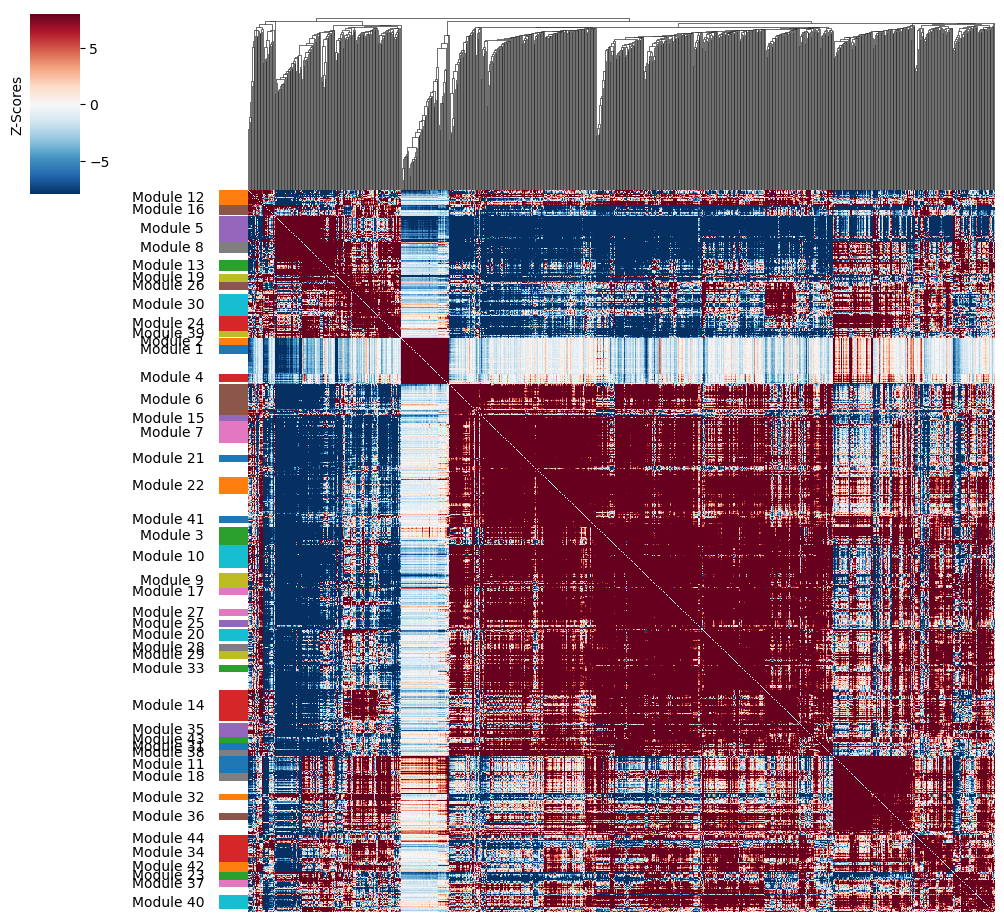

In [57]:
hs.plot_local_correlations()
plt.savefig("correlation_plot_min8.pdf", format="pdf")

In [4]:
hs.modules.max()

36

In [73]:
#save the hs object with pickle package
#import pickle
with open('./hotspot.pkl', 'wb') as f:
    pickle.dump(hs, f)

In [4]:
hs.modules[hs.modules.isin(range(37, 45))] = -1

In [5]:
module_scores = hs.calculate_module_scores()

module_scores.head()

Computing scores for 36 modules...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36/36 [03:41<00:00,  6.15s/it]


,1,2,3,4,5,6,7,8,9,10,...,27,28,29,30,31,32,33,34,35,36
BS22735A_bc1_10_bc2_10_bc3_17,0.027366,-0.080956,3.634737,-0.106564,-0.413218,0.300919,1.736224,-0.969063,1.394884,1.306373,...,0.303148,-0.029369,0.480177,-0.677917,0.303505,-0.227716,0.326029,-0.504547,0.076020,0.100293
BS22735A_bc1_10_bc2_10_bc3_25,-0.089197,-0.078915,-0.753672,-0.104076,0.370718,0.052994,1.103414,0.176292,-0.083382,-0.254206,...,-0.098515,0.033708,-0.150781,0.225120,0.011231,-0.081976,0.027214,-0.422841,-0.216135,-0.206015
BS22735A_bc1_10_bc2_10_bc3_38,-0.096168,-0.026277,3.336380,0.106843,-1.309796,-0.343152,1.744371,-0.616033,0.064544,1.791307,...,0.340958,0.056971,0.773628,0.198239,0.140580,-0.209200,0.146855,-0.139878,0.335879,0.010495
BS22735A_bc1_10_bc2_10_bc3_59,-0.080217,0.204496,0.417654,-0.056795,-1.423914,1.639148,-0.187014,-0.832199,1.017757,0.463582,...,0.130503,0.219109,0.065856,-0.147121,0.045364,-0.137255,-0.071699,-0.123664,0.208254,0.019642
BS22735A_bc1_10_bc2_10_bc3_7,-0.081124,-0.071651,-0.774689,-0.095440,-2.075407,4.061327,0.719552,-1.084739,-0.070891,0.992296,...,-0.131724,-0.319943,-0.225110,0.092637,0.344500,-0.191202,-0.316667,-0.443176,0.126481,-0.213516


In [67]:
module_cols = []
for c in module_scores.columns:
    key = f"Module {c}"
    adata.obs[key] = module_scores[c]
    module_cols.append(key)

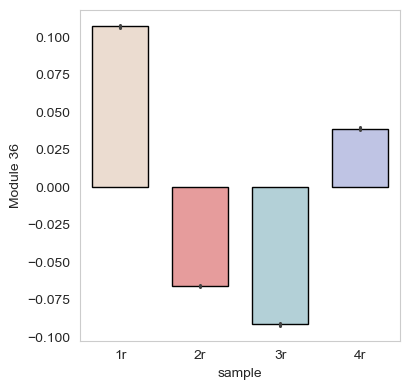

In [96]:
plt.figure(figsize=(4.2,4))
sns.set_style("whitegrid", {'axes.grid' : False})
sns.barplot(x='sample',
             y='Module 36', data=adata.obs, width=0.7, #bar width 
            hue='sample',
            palette = ["#EFDCCC", "#F29090", "#ADD4DD", "#B9C0EA"], edgecolor='black',
            errorbar="se")
plt.tight_layout()
plt.savefig("Module36bar.pdf")

In [7]:
import os
sns.set_style("whitegrid", {'axes.grid' : False})

# Define the list of modules
modules = [f"Module {i}" for i in range(1, 37)]

# Create a directory to save the plots
output_dir = "figures"

# Loop through each module and generate the plots
for module in modules:
    # Create the plot
    g = sns.catplot(
        data=adata.obs, kind="bar",
        x="sample", y=module, col="cluster", 
        errorbar="se",
        hue='sample', palette=["#EFDCCC", "#F29090", "#ADD4DD", "#B9C0EA"], 
        edgecolor='black',
        height=4, aspect=.6,
    )
    
    # Save the plot as a PDF
    plot_filename = os.path.join(output_dir, f"{module}facet.pdf")
    plt.savefig(plot_filename, dpi=1000)

    # Close the plot to free memory
    plt.close()

/Users/peien/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/peien/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/peien/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/peien/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/peien/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/peien/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has 

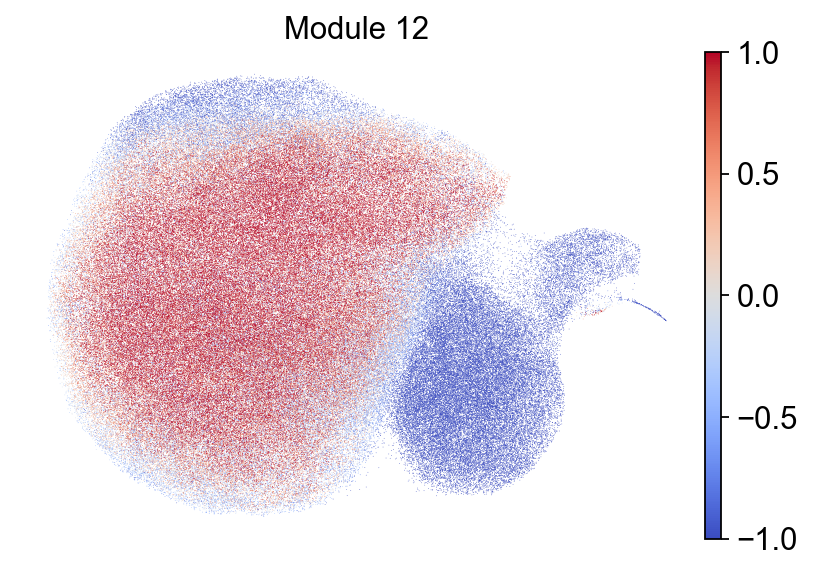

In [142]:
sc.set_figure_params(figsize=(6, 4))
sc.pl.umap(adata, 
           vmin=-1, vmax=1,
           color="Module 12", frameon=False, cmap="coolwarm",
          save="Module12.pdf")